#**Extreme Overfitting Example**

I'm going to simulate a set of random images and their associated labels. I want you to then fit a neural network to the random data. Finally, report how accurate the model is on the training data, and visualize training accuracy across epochs. 

Descriptive statistics for the training data:
                  0
count  3.920000e+06
mean   5.001113e-01
std    2.886281e-01
min    3.550267e-07
25%    2.501419e-01
50%    5.001447e-01
75%    7.501690e-01
max    9.999998e-01

The first ten labels are [1. 0. 4. 3. 7. 4. 6. 5. 4. 7.]



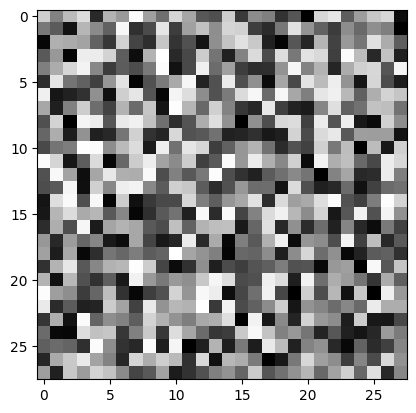

(5000, 784)
(5000, 1)


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im
import random

random.seed(123)

# Let's synthesize 20,000 images comprised of random pixel values.
train_images_random = np.random.random((5000, 28,28))
df = pd.DataFrame(train_images_random.reshape(-1)) #-1 is a wildcard; it'll guess what shape I want, and by default give a vector back.
print(f'Descriptive statistics for the training data:\n{df.describe()}\n')

# And let's make-up labels for them. 
train_labels_random = np.floor(np.random.random(5000)*10)
print(f'The first ten labels are {train_labels_random[:10]}\n')

# Here's what the first picture looks like.
plt.imshow(train_images_random[0],cmap=plt.cm.binary)
plt.show()

# Let's first convert each pixel matrix into a vector. 
train_images_random = train_images_random.reshape(5000,28*28)
train_labels_random = train_labels_random.reshape(5000,1)
print(train_images_random.shape)
print(train_labels_random.shape)

Now we will use the simulated data and fit a sequential Keras model that has 512 units in the first layer, with a Relu activation, and then the output layer. 

In [5]:
# Setup your model topology here using the Sequential API.
model = keras.Sequential([
    layers.Dense(units=512,activation="relu"),
    layers.Dense(units=10,activation="softmax")
])

# Compile the model
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

# Train the model
history = model.fit(train_images_random,train_labels_random,batch_size=16,epochs=30)


Epoch 1/30
313/313 [==============================] - 1s 2ms/step - loss: 2.4029 - accuracy: 0.1040
Epoch 2/30
313/313 [==============================] - 1s 2ms/step - loss: 2.3123 - accuracy: 0.1034
Epoch 3/30
313/313 [==============================] - 1s 2ms/step - loss: 2.3073 - accuracy: 0.1098
Epoch 4/30
313/313 [==============================] - 1s 2ms/step - loss: 2.3006 - accuracy: 0.1132
Epoch 5/30
313/313 [==============================] - 1s 2ms/step - loss: 2.2869 - accuracy: 0.1302
Epoch 6/30
313/313 [==============================] - 1s 2ms/step - loss: 2.2633 - accuracy: 0.1422
Epoch 7/30
313/313 [==============================] - 1s 2ms/step - loss: 2.2385 - accuracy: 0.1706
Epoch 8/30
313/313 [==============================] - 1s 2ms/step - loss: 2.1981 - accuracy: 0.1922
Epoch 9/30
313/313 [==============================] - 1s 2ms/step - loss: 2.1543 - accuracy: 0.2230
Epoch 10/30
313/313 [==============================] - 1s 2ms/step - loss: 2.1067 - accuracy: 0.2436

Okay, plot the training loss now... 

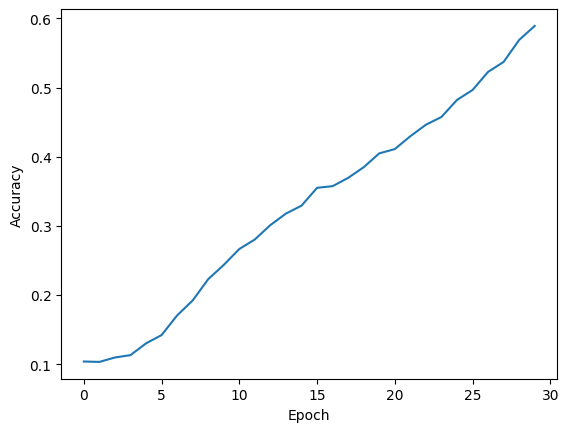

In [7]:
# Call plot commands here. 
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()